In [1]:
import numpy as np
import pandas as pd



In [65]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pprint
import random


import pandas as pd
from sklearn.metrics import silhouette_score

import scipy.stats

In [115]:
import importlib
# import dataImportFuctions
import functions
import VisFunctions
# import PrintFunctions

# importlib.reload(dataImportFuctions)
# from dataImportFuctions import main_data_dic_generator
# from dataImportFuctions import FC_dic_generator
# from dataImportFuctions import FCdic_to_concatenated_of_vectorized
# from dataImportFuctions import TS_extractor
# from dataImportFuctions import TS_controls_patients_concatenator
# from dataImportFuctions import TS_dic_to_NLDR_format
# from dataImportFuctions import desired_ROI_TS
# from dataImportFuctions import Network_TS_dic_generator

importlib.reload(functions)
from functions import shuffle_data_and_labels_strings
from functions import UMAP_implementation
from functions import stat_measure_low_dim_linearity
from functions import TS_stat_measure_low_dim_linearity
from functions import pval_vs_param_Avg
from functions import bootstrapper_subject_consistent
from functions import silhouette
from functions import two_nearest_neighbor_intrinsic_dim
from functions import estimate_global_dimension_pca
from functions import FisherSep_from_scikit
from functions import twoNN_from_scikit
from functions import MLE_from_scikit
from functions import CorrInt_from_scikit
from functions import DANCo_from_scikit
from functions import ESS_from_scikit
from functions import KNN_from_scikit
from functions import MADA_from_scikit
from functions import MiND_MLk_from_scikit
from functions import MiND_MLi_from_scikit
from functions import MOM_from_scikit
from functions import TLE_from_scikit
from functions import lpca_from_scikit
from functions import mannwhitneyu_stat
from functions import Benjamini_Hochberg_FDR_control
from functions import MiND_MLk_from_scikit1
from functions import MiND_MLi_from_scikit1

# importlib.reload(VisFunctions)
# from VisFunctions import FC_matrix_dfs_plot
# from VisFunctions import visualize_components
# from VisFunctions import visualize_6FC_components
from VisFunctions import Rain_Cloud_vis
from VisFunctions import Rain_Cloud_vis1

# importlib.reload(PrintFunctions)
# from PrintFunctions import print_dataframes


In [ ]:
# chunksize = 10000  # Adjust chunk size as needed

# for chunk in pd.read_csv('large_file.csv', chunksize=chunksize):
#     # Process each chunk here
#     print(chunk.head())

In [3]:
df= pd.read_csv('data_description.csv')

In [4]:
df.shape

(9963, 8)

In [5]:
print(df)

      subject_id                                        description  \
0       10001877  Patient ID: 10001877\nGender: M\nAge: 89\nYear...   
1       10002155  Patient ID: 10002155\nGender: F\nAge: 80\nYear...   
2       10003299  Patient ID: 10003299\nGender: F\nAge: 65\nYear...   
3       10004113  Patient ID: 10004113\nGender: M\nAge: 33\nYear...   
4       10004733  Patient ID: 10004733\nGender: M\nAge: 51\nYear...   
...          ...                                                ...   
9958    19994233  Patient ID: 19994233\nGender: F\nAge: 87\nYear...   
9959    19999442  Patient ID: 19999442\nGender: M\nAge: 41\nYear...   
9960    19999442  Patient ID: 19999442\nGender: M\nAge: 41\nYear...   
9961    19999840  Patient ID: 19999840\nGender: M\nAge: 58\nYear...   
9962    19999987  Patient ID: 19999987\nGender: F\nAge: 57\nYear...   

           stroke gender  anchor_age  anchor_year anchor_year_group  \
0        ischemic      M          89         2149       2008 - 2010   
1    

In [6]:
df.columns

Index(['subject_id', 'description', 'stroke', 'gender', 'anchor_age',
       'anchor_year', 'anchor_year_group', 'dod'],
      dtype='object')

In [9]:
df['subject_id'].shape

(9963,)

In [21]:
print(df['description'][1])

Patient ID: 10002155
Gender: F
Age: 80
Year of Admission: 2128

Diagnoses:
  - Malignant neoplasm of other parts of bronchus or lung
  - Pneumonia, organism unspecified
  - Acute and chronic respiratory failure
  - Blood in stool
  - Acute posthemorrhagic anemia
  - Hyposmolality and/or hyponatremia
  - Obstructive chronic bronchitis with (acute) exacerbation
  - Coronary atherosclerosis of unspecified type of vessel, native or graft
  - Aortocoronary bypass status
  - Other and unspecified hyperlipidemia
  - Hypertensive chronic kidney disease, unspecified, with chronic kidney disease stage I through stage IV, or unspecified
  - Chronic kidney disease, unspecified
  - Old myocardial infarction
  - Percutaneous transluminal coronary angioplasty status
  - Macular degeneration (senile), unspecified
  - Personal history of tobacco use
  - Anemia in neoplastic disease
  - Hypoxemia
  - Tachycardia, unspecified
  - Acute myocardial infarction of other anterior wall, initial episode of care

In [18]:
for column in df.columns:
    if column != 'description':
        print(column, ':')
        print(df[column][2])
        print(' ')

subject_id :
10003299
 
stroke :
ischemic
 
gender :
F
 
anchor_age :
65
 
anchor_year :
2173
 
anchor_year_group :
2008 - 2010
 
dod :
2183-08-12
 


In [22]:
dod_array = df['dod'].to_numpy()

In [23]:
dod_array

array([nan, '2131-03-10', '2183-08-12', ..., nan, '2164-09-17', nan],
      dtype=object)

In [58]:
dead_alive_array=np.zeros(len(dod_array))
dead_alive_array.shape

(9963,)

In [62]:
for i in range(len(dod_array)):
    if str(type(dod_array[i]))=="<class 'str'>":
        dead_alive_array[i]= 1

In [63]:
dead_alive_array.shape

(9963,)

In [64]:
dead_alive_array

array([0., 1., 1., ..., 0., 1., 0.])

In [67]:
embedded_vectors= np.load('encoded_data.npy')

In [71]:
print(embedded_vectors.shape)
print(dead_alive_array.shape)

(9963, 4096)
(9963,)


In [ ]:
    NN=25

    #controls
    GDim_dead=[]

    for i in range(len(dead_alive_array)):
        dataa= data_0b[key]
        GDim,_= twoNN_from_scikit(dataa,NN)
        GDim_c_0b.append(GDim)


    GDim_c_0b= np.array(GDim_c_0b)

In [80]:
deads_vecs= []
alives_vecs= []
for i in range(len(dead_alive_array)):
    if dead_alive_array[i]==1:
        alives_vecs.append(embedded_vectors[i])
alives_vecs= np.array(alives_vecs)

print(alives_vecs.shape)

for i in range(len(dead_alive_array)):
    if dead_alive_array[i]==0:
        deads_vecs.append(embedded_vectors[i])
deads_vecs= np.array(deads_vecs)

print(deads_vecs.shape)

(3748, 4096)
(6215, 4096)


In [84]:


def select_random_subjects(subject_ids, subject_ages, n=25, seed=None):
    """
    Randomly selects `n` subjects from the provided arrays of IDs and ages.

    Parameters:
        subject_ids (numpy.ndarray): Array of subject IDs.
        subject_ages (numpy.ndarray): Array of subject ages.
        n (int): Number of subjects to select.
        seed (int): Seed for random number generator.

    Returns:
        numpy.ndarray: Selected IDs.
        numpy.ndarray: Selected ages.
    """
    if len(subject_ids) != len(subject_ages):
        raise ValueError("Subject IDs and ages must have the same length.")
    
    np.random.seed(seed)  # Set the random seed for reproducibility
    indices = np.random.choice(len(subject_ids), size=n, replace=False)
    print(indices+1)
    
    return subject_ids[indices], subject_ages[indices]

# Example usage:
subject_ids = np.arange(1, 1001)  # Example subject IDs from 1 to 1000
subject_ages = np.random.randint(18, 80, size=1000)  # Random ages between 18 and 80

selected_ids, selected_ages = select_random_subjects(subject_ids, subject_ages, n=25, seed=42)

print("Selected IDs:", selected_ids)
print("Selected Ages:", selected_ages)


[522 738 741 661 412 679 627 514 860 137 812  77 637 974 939 900 281 884
 762 320 550 175 372 528 211]
Selected IDs: [522 738 741 661 412 679 627 514 860 137 812  77 637 974 939 900 281 884
 762 320 550 175 372 528 211]
Selected Ages: [37 63 79 62 39 76 52 71 41 46 51 50 61 68 53 31 47 75 58 27 20 57 65 79
 74]


In [124]:
#2NN

sample_size=600
NN= 300

dead_sample_manifold_Int_Dim=[]
alive_sample_manifold_Int_Dim=[]
# seeds= [45,24,63,73,98,82,912,645,118,133]
seeds= [11,22,33,44,55,66,77,88,99,100,45,24,63,73,98,82,912,645,118,133]



for seed in seeds:
    dead_sample_vecs= []

    np.random.seed(seed)  # Set the random seed for reproducibility
    indices = np.random.choice(len(subject_ids), size=sample_size, replace=False)
    # print(indices)
    for i in range(sample_size):
        dead_sample_vecs.append(deads_vecs[indices[i]])
    dead_sample_vecs= np.array(dead_sample_vecs)
    # print(dead_sample_vecs)
    # print(dead_sample_vecs.shape)
    GDim,_= twoNN_from_scikit(dead_sample_vecs,NN)
    # print(GDim)
    dead_sample_manifold_Int_Dim.append(GDim)
    print(GDim)

print(dead_sample_manifold_Int_Dim)
    

for seed in seeds:
    alive_sample_vecs= []

    np.random.seed(seed)  # Set the random seed for reproducibility
    indices = np.random.choice(len(subject_ids), size=sample_size, replace=False)
    # print(indices)
    for i in range(sample_size):
        alive_sample_vecs.append(alives_vecs[indices[i]])
    alive_sample_vecs= np.array(alive_sample_vecs)
    # print(dead_sample_vecs)
    # print(alive_sample_vecs.shape)
    GDim,_= twoNN_from_scikit(alive_sample_vecs,NN)

    # print(GDim)
    alive_sample_manifold_Int_Dim.append(GDim)
    print(GDim)


print(alive_sample_manifold_Int_Dim)

MW_pvalue =mannwhitneyu_stat(dead_sample_manifold_Int_Dim, alive_sample_manifold_Int_Dim)
print(MW_pvalue)
    

0.36347407501038886
4.054761584890751
5.1954920780289715
4.2480366500020255
0.34345418678529444
0.3691346872612613
4.5061121700311375
0.36724019226359234
0.3552264587518815
4.536395543333753
4.827015460564546
4.475270654779777
0.3079488751537753
3.9267880174995344
4.612780472251383
4.473358087815097
5.4137680293637995
4.1735113241877855
4.637932528011307
4.538185849799512
[0.36347407501038886, 4.054761584890751, 5.1954920780289715, 4.2480366500020255, 0.34345418678529444, 0.3691346872612613, 4.5061121700311375, 0.36724019226359234, 0.3552264587518815, 4.536395543333753, 4.827015460564546, 4.475270654779777, 0.3079488751537753, 3.9267880174995344, 4.612780472251383, 4.473358087815097, 5.4137680293637995, 4.1735113241877855, 4.637932528011307, 4.538185849799512]
3.5047833486094238
0.2569746074054194
0.6184492375964784
3.594860228085572
0.2463658758550987
3.9972304060351194
0.3346337562326557
0.2690277372013054
3.8406913073699243
0.4147488725319338
0.6243902822447973
0.2589471716796283
0.

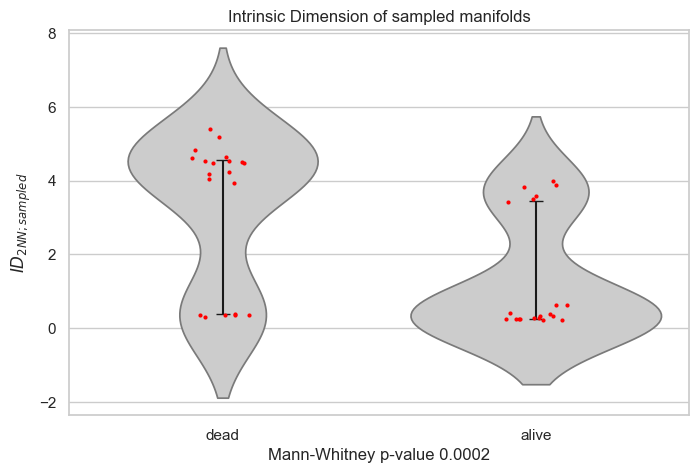

In [125]:

Rain_Cloud_vis(dead_sample_manifold_Int_Dim, #group1 data
        alive_sample_manifold_Int_Dim, #group2 data
        'dead', #label of group1
        'alive', #label of group2
        "Mann-Whitney p-value " + f'{MW_pvalue:.4f}', #x_label
        "$ID_{2NN;sampled}$", #y_label plt.xlabel(fr"$\psi_{{{i}}}$")
        f'Intrinsic Dimension of sampled manifolds' #title  2-back Int Dim minus 0-back  Int Dim
        ) 


3.6985457944875946
5.170841989420171
4.449361842963922
3.898323855405762
3.751079157593497
3.531770352756852
4.280391340175072
4.467729843306817
3.9259994458847878
4.387221634543865
4.371239183443135
3.9524308891833915
4.381009084562464
4.571604196976142
3.930156196055867
3.768474931802304
5.489368074750254
3.959557748618448
5.576347598817343
4.139080576128114
[3.6985457944875946, 5.170841989420171, 4.449361842963922, 3.898323855405762, 3.751079157593497, 3.531770352756852, 4.280391340175072, 4.467729843306817, 3.9259994458847878, 4.387221634543865, 4.371239183443135, 3.9524308891833915, 4.381009084562464, 4.571604196976142, 3.930156196055867, 3.768474931802304, 5.489368074750254, 3.959557748618448, 5.576347598817343, 4.139080576128114]
3.637089003061016
4.324084559934895
3.911965654147017
3.3871600153211094
3.8084142053684267
2.920339564228935
4.04450206537071
3.591471208149243
3.808920734571891
3.6357807544020706
3.7971423905385717
3.793252848699448
4.030084669645615
3.48123144176971

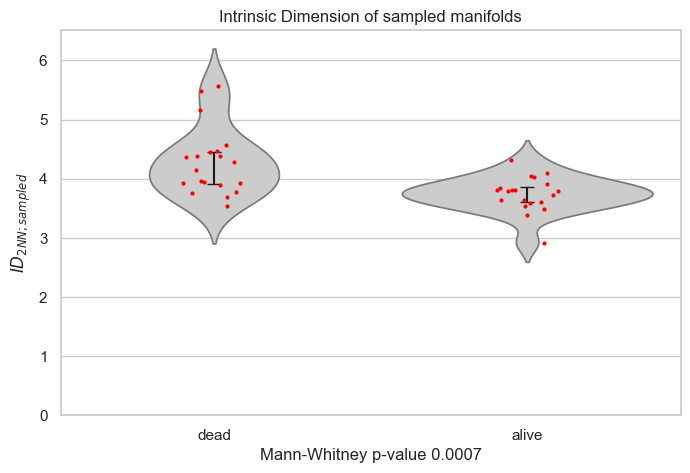

In [128]:
#2NN

sample_size=200
NN= 25

dead_sample_manifold_Int_Dim=[]
alive_sample_manifold_Int_Dim=[]
# seeds= [45,24,63,73,98,82,912,645,118,133]
seeds= [11,22,33,44,55,66,77,88,99,100,45,24,63,73,98,82,912,645,118,133]



for seed in seeds:
    dead_sample_vecs= []

    np.random.seed(seed)  # Set the random seed for reproducibility
    indices = np.random.choice(len(subject_ids), size=sample_size, replace=False)
    # print(indices)
    for i in range(sample_size):
        dead_sample_vecs.append(deads_vecs[indices[i]])
    dead_sample_vecs= np.array(dead_sample_vecs)
    # print(dead_sample_vecs)
    # print(dead_sample_vecs.shape)
    GDim,_= twoNN_from_scikit(dead_sample_vecs,NN)
    # print(GDim)
    dead_sample_manifold_Int_Dim.append(GDim)
    print(GDim)

print(dead_sample_manifold_Int_Dim)
    

for seed in seeds:
    alive_sample_vecs= []

    np.random.seed(seed)  # Set the random seed for reproducibility
    indices = np.random.choice(len(subject_ids), size=sample_size, replace=False)
    # print(indices)
    for i in range(sample_size):
        alive_sample_vecs.append(alives_vecs[indices[i]])
    alive_sample_vecs= np.array(alive_sample_vecs)
    # print(dead_sample_vecs)
    # print(alive_sample_vecs.shape)
    GDim,_= twoNN_from_scikit(alive_sample_vecs,NN)

    # print(GDim)
    alive_sample_manifold_Int_Dim.append(GDim)
    print(GDim)


print(alive_sample_manifold_Int_Dim)

MW_pvalue =mannwhitneyu_stat(dead_sample_manifold_Int_Dim, alive_sample_manifold_Int_Dim)
print(MW_pvalue)

Rain_Cloud_vis(dead_sample_manifold_Int_Dim, #group1 data
        alive_sample_manifold_Int_Dim, #group2 data
        'dead', #label of group1
        'alive', #label of group2
        "Mann-Whitney p-value " + f'{MW_pvalue:.4f}', #x_label
        "$ID_{2NN;sampled}$", #y_label plt.xlabel(fr"$\psi_{{{i}}}$")
        f'Intrinsic Dimension of sampled manifolds' #title  2-back Int Dim minus 0-back  Int Dim
        ) 
    

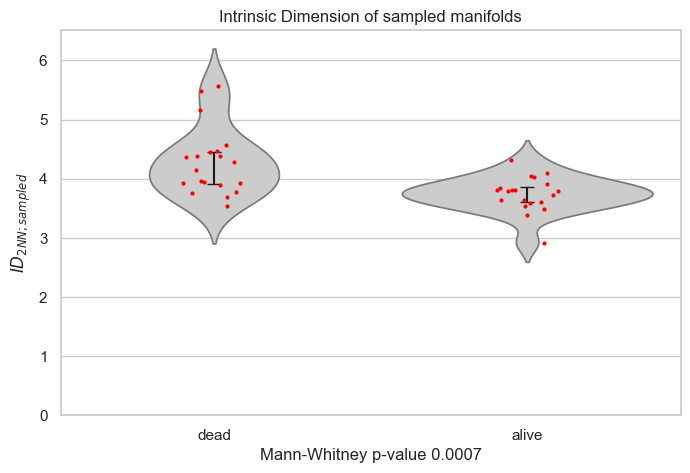

In [108]:
#PCA
Var=0.9

sample_size=300
NN= 50

dead_sample_manifold_Int_Dim=[]
alive_sample_manifold_Int_Dim=[]
seeds= [11,22,33,44,55,66,77,88,99,100,45,24,63,73,98,82,912,645,118,133]



for seed in seeds:
    dead_sample_vecs= []

    np.random.seed(seed)  # Set the random seed for reproducibility
    indices = np.random.choice(len(subject_ids), size=sample_size, replace=False)
    # print(indices)
    for i in range(sample_size):
        dead_sample_vecs.append(deads_vecs[indices[i]])
    dead_sample_vecs= np.array(dead_sample_vecs)
    # print(dead_sample_vecs)
    # print(dead_sample_vecs.shape)
    GDim= estimate_global_dimension_pca(dead_sample_vecs,Var)

    # print(GDim)
    dead_sample_manifold_Int_Dim.append(GDim)

print(dead_sample_manifold_Int_Dim)
    

for seed in seeds:
    alive_sample_vecs= []

    np.random.seed(seed)  # Set the random seed for reproducibility
    indices = np.random.choice(len(subject_ids), size=sample_size, replace=False)
    # print(indices)
    for i in range(sample_size):
        alive_sample_vecs.append(alives_vecs[indices[i]])
    alive_sample_vecs= np.array(alive_sample_vecs)
    # print(dead_sample_vecs)
    # print(alive_sample_vecs.shape)
    GDim= estimate_global_dimension_pca(alive_sample_vecs,Var)

    # print(GDim)
    alive_sample_manifold_Int_Dim.append(GDim)


print(alive_sample_manifold_Int_Dim)
    
MW_pvalue =mannwhitneyu_stat(dead_sample_manifold_Int_Dim, alive_sample_manifold_Int_Dim)
print(MW_pvalue)

[4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 4, 4, 3]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4]
4.315416242283126e-05


In [111]:
#MiND_MLi_from_scikit1(dataa, kk=10, DD=20)

sample_size=300
NN= 50

dead_sample_manifold_Int_Dim=[]
alive_sample_manifold_Int_Dim=[]
seeds= [11,22,33,44,55,66,77,88,99,100,45,24,63,73,98,82,912,645,118,133]



for seed in seeds:
    dead_sample_vecs= []

    np.random.seed(seed)  # Set the random seed for reproducibility
    indices = np.random.choice(len(subject_ids), size=sample_size, replace=False)
    # print(indices)
    for i in range(sample_size):
        dead_sample_vecs.append(deads_vecs[indices[i]])
    dead_sample_vecs= np.array(dead_sample_vecs)
    # print(dead_sample_vecs)
    # print(dead_sample_vecs.shape)
    
    GDim= MiND_MLi_from_scikit1(dead_sample_vecs, kk=10, DD=20)

    # print(GDim)
    dead_sample_manifold_Int_Dim.append(GDim)

print(dead_sample_manifold_Int_Dim)
    

for seed in seeds:
    alive_sample_vecs= []

    np.random.seed(seed)  # Set the random seed for reproducibility
    indices = np.random.choice(len(subject_ids), size=sample_size, replace=False)
    # print(indices)
    for i in range(sample_size):
        alive_sample_vecs.append(alives_vecs[indices[i]])
    alive_sample_vecs= np.array(alive_sample_vecs)
    # print(dead_sample_vecs)
    # print(alive_sample_vecs.shape)
    GDim= MiND_MLi_from_scikit1(alive_sample_vecs, kk=10, DD=20)

    # print(GDim)
    alive_sample_manifold_Int_Dim.append(GDim)


print(alive_sample_manifold_Int_Dim)
    
MW_pvalue =mannwhitneyu_stat(dead_sample_manifold_Int_Dim, alive_sample_manifold_Int_Dim)
print(MW_pvalue)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
1.0
